# Important Links
[Google Sheets for all the data](https://docs.google.com/spreadsheets/d/1VdpyE1U5U7KSwADGs2HePfk02XhC_Z1drSr5FYYckhw/edit?usp=sharing)

[Game Summary](https://docs.google.com/forms/d/e/1FAIpQLSeW9pjkvfOi6P7DYz_Q80-lzYAGcoV1tygJCieJoyRDpaES4Q/viewform?usp=dialog)

[Wave](https://docs.google.com/forms/d/e/1FAIpQLScablE3Fmg8MNJkDhF9fbZDj89CHzYVwf_-R3rmSS9B7a0Fgg/viewform?usp=header)

[Ability](https://docs.google.com/forms/d/e/1FAIpQLSdMv2OjR-wEv6eOubeQ4n7LzH69-5BVpZs1KIMNYE3fg0vl1w/viewform?usp=header)

# Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

# Load Data

In [15]:
# Load the CSV data
df = pd.read_csv('CSCI526 Matrics (Responses) - Ability.csv')

# Parse Position into X and Y
df[['X', 'Y']] = df['Position'].str.strip('"').str.split(',', expand=True).astype(float)

# Display the first few rows
df.head()

,Timestamp,SessionID,Time,Wave,Position,X,Y
0,10/20/2025 14:14:51,638965664797985202,10.097,1,"-8.928,-101.581",-8.928,-101.581
1,10/20/2025 14:15:19,638965664797985202,38.765,2,"-11.470,-70.863",-11.470,-70.863
2,10/20/2025 14:15:21,638965664797985202,40.343,2,"17.787,-65.206",17.787,-65.206
3,10/20/2025 14:15:22,638965664797985202,42.047,2,"42.559,-79.943",42.559,-79.943
4,10/20/2025 14:16:04,638965665586355356,4.698,1,"43.834,-102.311",43.834,-102.311


In [24]:
# Load wave duration data
wave_duration_df = pd.read_csv('CSCI526 Matrics (Responses) - Wave.csv')

# Display the first few rows
wave_duration_df.head()

,Timestamp,SessionID,WaveDuration,WaveNumber
0,10/20/2025 19:23:10,638965849646730422,23.680,1
1,10/20/2025 19:26:15,638965851484104931,25.620,1
2,10/20/2025 19:27:52,638965852497248600,21.453,1
3,10/20/2025 19:10:00,638965849646730422,53.181,1
4,10/20/2025 19:01:00,638965851484104931,26.171,1


In [25]:
# Load summary data
summary_df = pd.read_csv('CSCI526 Matrics (Responses) - Game Summary.csv')

# Display the first few rows
summary_df.head()

,Timestamp,SessionID,TotalSurvivalTime,FinalWaveCount
0,10/20/2025 19:24:20,638965849646730422,94.300,1
1,10/20/2025 19:25:45,638965851240759728,19.460,0
2,10/20/2025 19:26:28,638965851484104931,39.100,1
3,10/20/2025 19:26:28,638965851484104931,39.100,1
4,10/20/2025 19:26:59,638965851945283500,24.079,0


# Load Map Image

In [18]:

img = mpimg.imread('image.png')

# Box Plot of Wave Durations

This chart shows the distribution of time spent per wave, including median, quartiles, and outliers. It reflects the relative difficulty and pacing of each wave.

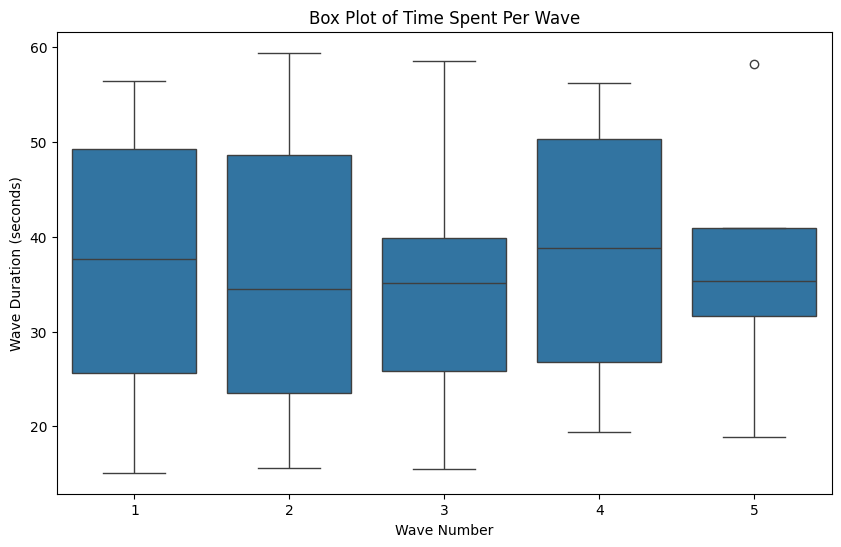

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=wave_duration_df, x='WaveNumber', y='WaveDuration')
plt.title('Box Plot of Time Spent Per Wave')
plt.xlabel('Wave Number')
plt.ylabel('Wave Duration (seconds)')
plt.show()

# Histograms of Player Survival Time and Final Wave Count

These charts show the distribution of total survival time and the count of final waves reached by players. They help assess overall game difficulty and player performance.

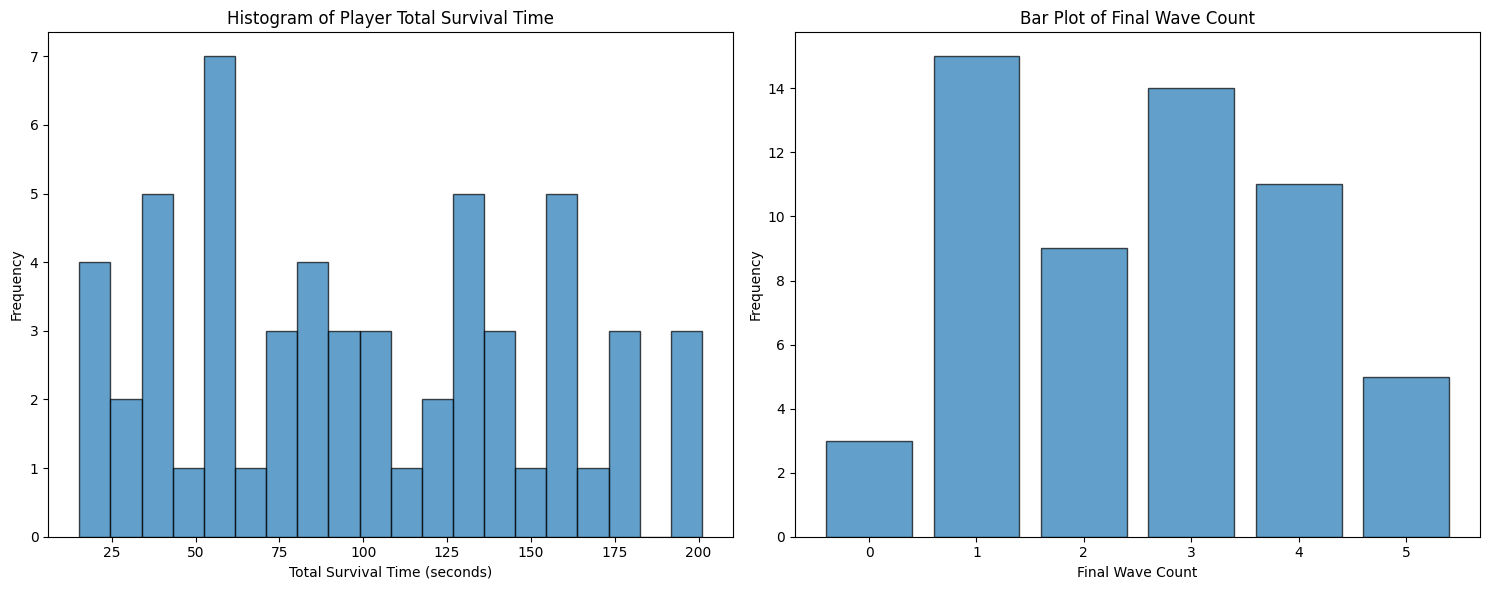

In [ ]:
# Create subplots for the two histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Total Survival Time
axes[0].hist(summary_df['TotalSurvivalTime'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Player Total Survival Time')
axes[0].set_xlabel('Total Survival Time (seconds)')
axes[0].set_ylabel('Frequency')

# Bar plot for Final Wave Count
wave_counts = summary_df['FinalWaveCount'].value_counts().sort_index()
axes[1].bar(wave_counts.index, wave_counts.values, edgecolor='black', alpha=0.7)
axes[1].set_title('Bar Plot of Final Wave Count')
axes[1].set_xlabel('Final Wave Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Heatmap of Ability Positions

This chart uses a heatmap to show the concentrated areas where players released abilities. Darker colors indicate higher frequency of ability releases in that area.

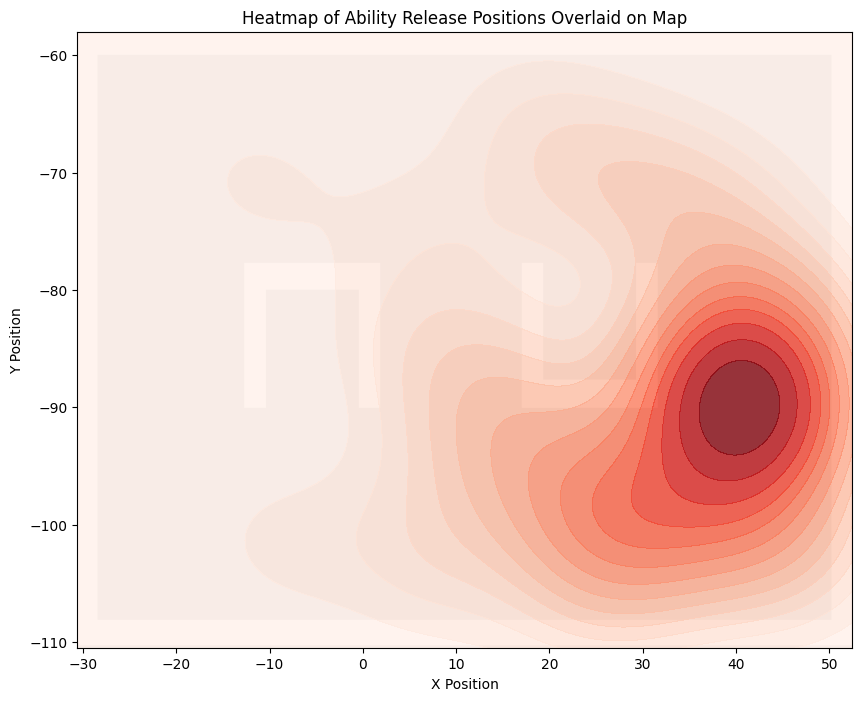

In [ ]:
plt.figure(figsize=(10, 8))
# xmin = -30.61, xmax = 52.48, ymin = -110.5, ymax = -58
extent = [-30.61, 52.48, -110.5, -58]

# Display the map image with the specified extent and ensure it is placed below the heatmap
plt.imshow(img, extent=extent, aspect='auto', origin='lower', zorder=0, alpha=0.7)

# Overlay the heatmap on top
sns.kdeplot(data=df, x='X', y='Y', cmap='Reds', fill=True, thresh=0, alpha=0.8, zorder=1, levels=15)

# Force the plot limits to match the extent so the image fills the axes exactly
plt.xlim(extent[0], extent[1])
plt.ylim(extent[2], extent[3])

plt.title('Heatmap of Ability Release Positions Overlaid on Map')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().set_aspect('auto')
plt.show()

# Histogram of Ability Release Times

This chart shows the frequency of ability releases at different time points after the game started.

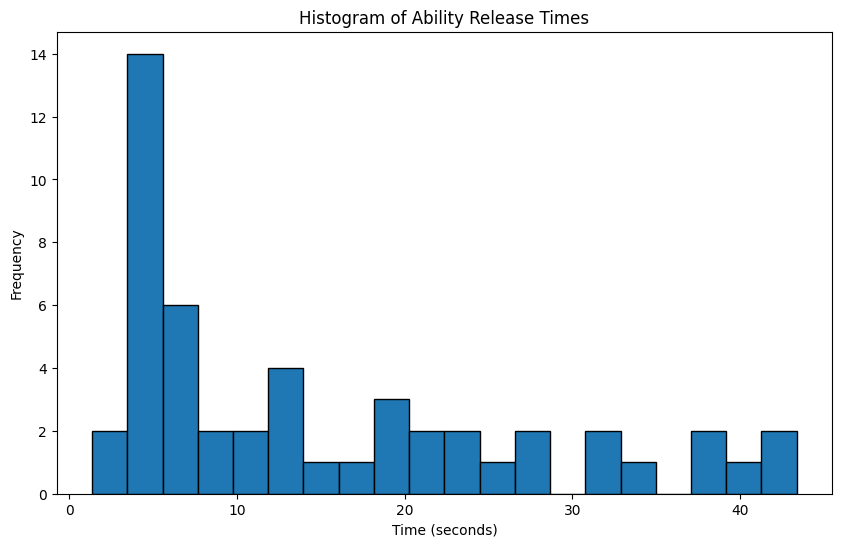

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=20, edgecolor='black')
plt.title('Histogram of Ability Release Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()